<a href="https://colab.research.google.com/github/jollypyun/Machinelearning/blob/main/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **모델 훈련**



## **선형 회귀**
일반적으로 선형 모델은 입력 특성의 **가중치 합**과 **편향(bias)**이라는 상수를 더해 예측을 만든다.  



In [1]:
import matplotlib.pyplot as plt
import numpy as np
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.rand(100, 1)

x_b = np.c_[np.ones((100, 1)), x]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y) # 정규방정식 : theta_best를 구하기 위한 공식
theta_best # 비용 함수를 최소화하는 θ값

array([[4.43640681],
       [3.04297068]])

* np.linalg : 선형대수 모듈
  *   det(x) : 행렬식(Determinant), 출력 - 행렬식 값 리턴
  *   inv(x) : 역행렬(Inverse), 출력 - 역행렬 리턴
  *   eig(x) : 고유값(Eigenvalue), 고유벡터(Eigenvector), 고유값과 고유벡터를 리턴
  *   svd(A) : 특이값 분해(Single Value Decomposition), 행렬을 대각화하는 방법. U, Sigma, Vt 리턴
  *   solve(a,b) : 연립방정식 해 풀기, 해를 리턴
  *   lstsq(A, y, rcond = None)[0] : 최소자승 해 풀기, 최소자승법으로 잔차 제곱합을 최소화하는 회귀계수를 추정한다. x - Least-sqaures solution, residuals - Sums of squared residuals, rank - rank of matrix, s - Singular values
  *   pinv(x) : 유사역행렬(무어-펜로즈 역행렬)

* np.T : 전치행렬, 전치행렬 리턴


In [2]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]
y_predict = x_new_b.dot(theta_best)
y_predict

array([[ 4.43640681],
       [10.52234817]])

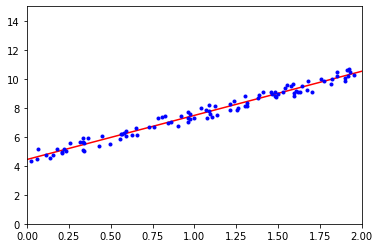

In [3]:
plt.plot(x_new, y_predict, "r-")
plt.plot(x, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
lin_reg.coef_, lin_reg.intercept_

(array([[3.04297068]]), array([4.43640681]))

In [6]:
lin_reg.predict(x_new)

array([[ 4.43640681],
       [10.52234817]])

LinearRegression는 lstsq()함수를 기반으로 한다.

In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond = 1e-6)
theta_best_svd

array([[4.43640681],
       [3.04297068]])

In [8]:
np.linalg.pinv(x_b).dot(y)

array([[4.43640681],
       [3.04297068]])

정규방정식을 계산하는 것보다 특잇값 분해라는 표준 행렬 분해 기법을 사용해 계산되는 것이 효율적이다. 또한 정규방정식은 조건을 타지만 

In [9]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients = 2 / m * x_b.T.dot(x_b.dot(theta) - y)
  theta = theta - eta * gradients

In [10]:
theta

array([[4.43640681],
       [3.04297068]])

In [11]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2, 1)
m = 500 # 훈련세트에 있는 샘플 수

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi =  x_b[random_index:random_index + 1]
    yi = y[random_index: random_index + 1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

theta

array([[4.09743783],
       [3.31608108]])

In [12]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(x, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.39171071]), array([3.05117324]))

## **다항 회귀**
비선형 데이터를 학습하는 데 선형 모델을 사용할 수 있다. 각 특성의 거듭제곱을 새로운 특성으로 차가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것.  
  
간단한 2차방정식으로 비선형데이터를 만들어 예를 들어보겠다.

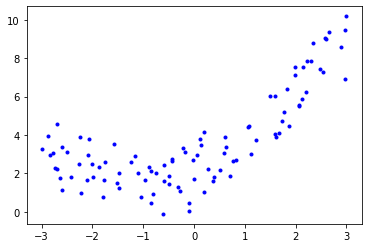

In [13]:
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x ** 2 + x + 2 + np.random.randn(m, 1)
plt.plot(x,y,'b.')
plt.show()

그래프와 같이 직선으로는 이 데이터를 분류할 수 없을 것이다. 그렇기에 PolynomialFeatures를 사용해 훈련 데이터를 변환해보겠다. 훈련 세트에 있는 각 특성을 제곱하여 새로운 특성으로 추가한다.

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False) # 이차, 편향을 위한 특성인 1이 추가되지 않음
x_poly = poly_features.fit_transform(x)
print(x[0], x_poly[0])

[0.60371548] [0.60371548 0.36447237]


In [15]:
a = lin_reg.fit(x_poly,y)
print(lin_reg.intercept_, lin_reg.coef_)

[2.18367385] [[1.01037019 0.48565208]]


학습 곡선을 살펴보는 것이다. 이 그래프는 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타냅니다. 그래프는 생성하기 위해서는 단순히 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러번 훈련시키면 된다. 다음 코드는 주어진 훈련 데이터에서 모델의 학습 곡선을 그리는 함수를 정의한다.

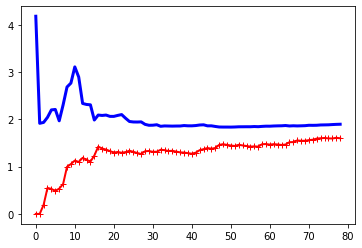

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x, y):
  x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(x_train)):
    model.fit(x_train[:m], y_train[:m])
    y_train_predict = model.predict(x_train[:m])
    y_val_predict = model.predict(x_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label = "훈련 세트")
  plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "검증 세트")

plot_learning_curves(lin_reg, x, y)

 **훈련 데이터**
 * 그래프가 0에서 시작한다. 이것으로 보아 하나 혹은 두 개의 샘플이 있을 때는 모델이 완벽하게 작동한다.
 * 샘플이 추가됨에 따라 잡음도 있고 비선형이기 때문에 모델이 훈련 데이터를 완벽히 학습하는 것이 불가능해진다.
 * 그래서 곡선이 어느 정도 평평해질 때까지 오차가 계속 상승한다.
 * 또한 훈련 세트에 샘플이 추가되어도 평균 오차가 크게 나아지거나 나빠지지 않는다.  
   
 
 **검증 데이터**
 * 적은 수의 훈련 샘플로 훈련될 때는 제대로 일반화 딜 수 없어서 검증 오차가 초기에 매우 크다.
 * 모델에 훈련 샘플이 추가됨에 따라 학습이 되고 검증 오차가 천천히 감소된다.
 * 선형 회귀의 직선은 데이터를 잘 모델링할 수 없으므로 오차의 감소가 완만해져서 훈련 세트의 그래프와 가까워진다.  

이러한 학습 곡선은 과소적합 모델의 전형적인 모습이다. 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해 있다. 또한 훈련 샘플을 추가한다 하더라도 효과가 없다. 이러한 경우는 더 복잡한 모델을 사용하거나 더 나은 특성을 선택해야 한다.

같은 데이터에 10차 다항 회귀 모델의 학습 곡선을 그려보자.

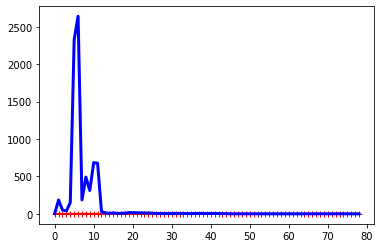

In [17]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                                  ("poly_features", PolynomialFeatures(degree = 10, include_bias=False)),
                                  ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, x, y)

* 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다.
* 두 곡선 사이에 공간이 있다. 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻이고 이는 과대적합 모델의 특이다. 그러나, 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워진다.
* 고대적합 모델을 개선하는 방법은 검증 오차가 훈련 오차에 근접할 때까지 더 많은 훈련 데이터를 추가하는 것이다.

* 편향 : 일반화 오차 중에서 편향은 잘못된 가정으로 인한 것이다. 편향이 큰 모델은 훈련 데이터에 과소적합되기 쉽다.
* 분산 : 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타난다. 자유도가 높은 모델이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합되는 경향이 있다.
* 줄일 수 없는 오차 : 데이터 자체에 있는 잡음 때문에 발생한다. 이 오차를 유일한 방법은 데이터에서 잡음을 제거하는 것이다.

모델의 복잡도가 커지면 통상적으로 분산이 늘어나고 편향은 줄어든다. 반대로 모델의 복잡도가 줄어들면 편향이 커지고 분산이 작아진다. 이것을 트레이드오프라고 부른다.

과대적합을 감소시키는 좋은 방법은 모델을 규제하는 것이다.  
다항 회귀 모델에서는 다항식의 차수를 감소시키는 것이다.  
  
선형 회귀 모델에서는 보통 모델의 가중치를 제한함으로써 규제를 가한다. 각기 다른 방법으로 가중치를 제한하는 '릿지', '라쏘', '엘라스틱넷'을 본다.

**릿지 회귀**  
규제가 추가된 선형 회귀 버전이다. 규제항($\alpha\sum_{i=1}^{n}\theta_i^2$)이 비용 함수에 추가되어 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 한 작게 유지되도록 노력한다.  
모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가한다.  
  
$\alpha$는 모델을 얼마나 많이 규제할지 조절하는 하이퍼파라미터이다. 0이 되면 선형 회귀와 같이지고 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 된다. 릿지 회귀의 비용 함수식은 아래와 같다.  
  
$$J(\theta) = MSE(\theta) + \alpha{1 \over 2}\sum_{i=1}^{n}\theta_i^2$$
편향 $\theta_0$는 규제되지 않는다.  
  
몇 가지 다른 $\alpha$를 사용해 릿지 모델을 훈련시킬 것이다. 

In [18]:
np.random.seed(42)
m = 20
x = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * x + np.random.randn(m, 1) / 15
x_new = np.linspace(0, 3, 100).reshape(100, 1)

In [19]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver = "cholesky", random_state = 42)
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]])

array([[1.72674942]])

In [20]:
ridge_reg = Ridge(alpha = 1, solver = "sag", random_state = 42)
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]])

array([[1.7269393]])

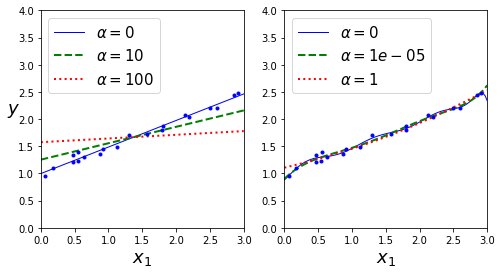

In [21]:
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
  for alpha, style in zip(alphas, ("b-", "g--", "r:")):
    model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
    if polynomial == True:
      model = Pipeline([
                        ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
                        ("std_scaler", StandardScaler()),
                        ("regul_reg", model)
      ])
    model.fit(x,y)
    y_new_regul = model.predict(x_new)
    lw = 2 if alpha > 0 else 1
    plt.plot(x_new, y_new_regul, style, linewidth = lw, label = r"$\alpha = {}$".format(alpha))
  plt.plot(x, y, "b.", linewidth = 3)
  plt.legend(loc = "upper left", fontsize = 15)
  plt.xlabel("$x_1$", fontsize = 18)
  plt.axis([0,3,0,4])

plt.figure(figsize = (8,4))
plt.subplot(121)
plot_model(Ridge, polynomial = False, alphas = (0, 10, 100), random_state = 42)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.subplot(122)
plot_model(Ridge, polynomial = True, alphas = (0, 10**-5, 1), random_state = 42)
plt.show()

### **라쏘 회귀 (Least Absolute Shrinkage and Selection Operator 회귀)**

릿지 회귀 처럼 비용 함쉬에 규제항을 더하지만 $l_2$노름의 제곱을 2로 나눈 것 대신 가중치 벡터의 $l_1$노름을 사용한다. 아래는 라쏘 회귀의 비용 함수를 나타낸 것이다.
$$J(\theta) = MSE(\theta) + \alpha\sum_{i=1}^{n}\left|\theta_i\right|$$  
아래는 라쏘 회귀를 활용한 코드와 릿지 모델보다 더 작은 $\alpha$값을 사용한 그래프이다.

In [22]:
sdg_reg = SGDRegressor(penalty = "l2", max_iter = 1000, tol = 1e-3, random_state = 42)
sdg_reg.fit(x, y.ravel())
sdg_reg.predict([[1.5]])

array([1.64448244])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.027993811745096055, tolerance: 0.00039324287419248904
  positive)


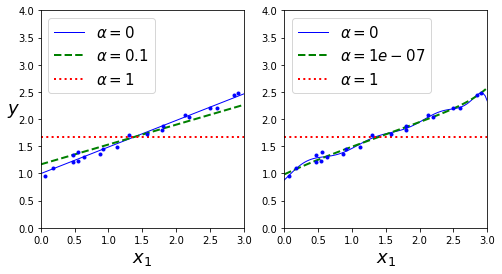

In [23]:
from sklearn.linear_model import Lasso

plt.figure(figsize = (8,4))
plt.subplot(121)
plot_model(Lasso, polynomial = False, alphas = (0, 0.1, 1), random_state = 42)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.subplot(122)
plot_model(Lasso, polynomial = True, alphas = (0, 10**-7, 1), random_state = 42)
plt.show()

중요한 특징은 덜 중요한 특성의 가중치를 0으로 만들어 제거하려고 하는 것이다. 차수가 높은 다항 특성의 가중치가 모두 0이 되었습니다. 이것으로 보아 라쏘 회귀는 자동으로 특성 선택을 하고 희소 모델을 만든다. 

### **엘라스틱넷**
릿지 회귀와 라쏘 회귀를 절충한 모델. 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율 r을 사용해 조절한다. r = 0이면 엘라스틱넷은 릿지 회귀와 같고 r = 1이면 라쏘 회귀와 같다.
$$J(\theta) = MSE(\theta) + r\alpha\sum_{i=1}^{n}\left|\theta_i\right| + {1-r \over 2}\alpha\sum_{i=1}^{n}\theta_i^2$$

일반 선형 회귀, 릿지 회귀, 라쏘 회귀, 엘라스틱넷은 언제 사용해야 할까?  
  
적어도 일반 선형 회귀는 피해야 한다. 이유는 규제가 약간이라도 있는 것이 대부분 좋기 때문이다.  
릿지가 기본이 되지만 쓰이는 특성이 몇 개뿐이라면 라쏘나 엘랏스틱넷이 훨씬 좋다. 이유는 이 모델들은 불필요한 특성의 가중치를 0으로 만들어 주기 때문이다.  
특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통은 문제를 일으키는 라쏘보다는 엘라스틱넷을 많이 쓴다.

엘라스틱넷의 예제이다.

In [24]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5, random_state = 42)
elastic_net.fit(x,y)
elastic_net.predict([[1.5]])

array([1.71936709])

In [25]:
np.random.seed(42)
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 2 + x + 0.5 * x ** 2 + np.random.randn(m,1)
x_train, x_val, y_train, y_val = train_test_split(x[:50], y[:50].ravel(), test_size = 0.5, random_state = 10)


### **조기 종료**
반복적인 학습 알고리즘을 규제하는 방법 중 하나로 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것이다. 아래는 예제이다.

In [26]:
from copy import deepcopy
poly_scaler = Pipeline([
                        ("poly_features", PolynomialFeatures(degree = 90, include_bias = False)),
                        ("std_scaler", StandardScaler())
])

x_train_poly_scaled = poly_scaler.fit_transform(x_train)
x_val_poly_scaled = poly_scaler.transform(x_val)
sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True, penalty = None, learning_rate = "constant", eta0 = 0.0005, random_state = 42)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(x_train_poly_scaled, y_train) # 중지된 곳에서 시작한다.
  y_val_predict = sgd_reg.predict(x_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = deepcopy(sgd_reg)

그래프로 알아보자.

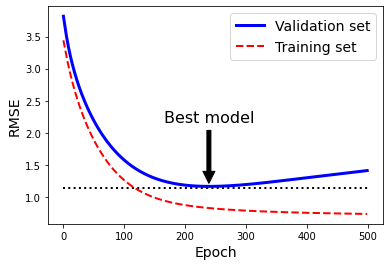

In [27]:
sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True, penalty = None, learning_rate = "constant", eta0 = 0.0005, random_state = 42)
n_epochs = 500
train_errors, val_errors = [],[]
for epoch in range(n_epochs):
  sgd_reg.fit(x_train_poly_scaled, y_train)
  y_train_predict = sgd_reg.predict(x_train_poly_scaled)
  y_val_predict = sgd_reg.predict(x_val_poly_scaled)
  train_errors.append(mean_squared_error(y_train, y_train_predict))
  val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy = (best_epoch, best_val_rmse),
             xytext = (best_epoch, best_val_rmse + 1),
             ha = "center",
             arrowprops = dict(facecolor = 'black', shrink = 0.05),
             fontsize = 16
             )
best_val_rmse -= 0.03 # 그래프를 더 보기 좋게 하기 위함.
plt.plot([0,n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth = 2)
plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth = 2, label = "Training set")
plt.legend(loc = "upper right", fontsize = 14)
plt.xlabel("Epoch", fontsize = 14)
plt.ylabel("RMSE", fontsize = 14)
plt.show()

In [28]:
print(best_epoch, best_model)

239 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=True)


### **로지스틱 회귀**
샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용됨. 추정 확률이 50%가 넘으면 그 샘플이 해당 클래스에 속한다고 예측한다. 이를 이진 분류기라고 한다.  
  
입력 특성의 가중치 합을 계산하고 편향을 더하는 방식으로 작동을 한다. 이 부분은 선형 회귀와 같지만 바로 결과를 출력하지 않고 결괏값의 로지스틱을 출력하는 것이 다른 점이다.  
  
여기서 로지스틱이란 0과 1사이의 값을 출력하는 시그모이드 함수(Sigmoid Function)이다. $\sigma(\centerdot)$로 표현한다. 아래는 로직스틱 회귀 모델의 확률 추정을 벡터 표현식과 시그모이드 함수이다.  
$$\hat{p} =  h_\theta(\mathbf{x}) = \sigma(\theta^{T}\mathbf{x})$$  
$$\sigma(t) = {1 \over 1+exp(-t)}$$  

위의 확률 추정에서 0.5이 넘어가면 해당 클래스에 속한다고 하였다. 즉, 1이 되고 아닌 경우는 0이 된다는 것이다.  
  
  
$$\hat{y} = \begin{cases}
0 & \mbox{if}\ \hat{p} < 0.5\\
1 & \mbox{if}\ \hat{p} \ge 0.5
\end{cases}$$

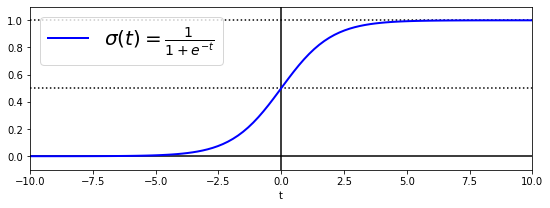

In [32]:
# 시그모이드 함수 그래프
t = np.linspace(-10, 10, 100)
sigma = 1 / (1 + np.exp(-t))

plt.figure(figsize = (9,3))
plt.plot([-10, 10], [0,0], "k-")
plt.plot([-10, 10], [0.5,0.5], "k:")
plt.plot([-10, 10], [1,1], "k:")
plt.plot([0,0],[-0.1, 1.1], "k-")
plt.plot(t, sigma, "b-", linewidth = 2, label = r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc = "upper left", fontsize = 20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

어떻게 추정하고 예측하는지는 알았으나 훈련은 어떻게 하는 것일까?  
훈련의 목적은 양성 샘플에 대해서는 높은 확률을 추정하고 음성 샘플에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터 $\mathbf{\theta}$를 찾는 것이다. 이러한 것은 하나의 훈련 샘플에 대한 비용 함수에서 나타난다.  
$$c(\mathbf{\theta}) = \begin{cases}
-log(\hat{p})& \mbox{if}\ y = 1\\
-log(1-\hat{p})& \mbox{else if}\ y = 0
\end{cases}$$  
t가 0에 가까워질수록 $-log(t)$가 매우 커진다. 즉, 모델이 양성 샘플을 0에 가까운 확률로 추정하면 비용이 크게 증가할 것이다. 이러한 것을 로그 손실이라 부르며 전체 훈련 세트에 대한 비용 함수를 하나의 식으로 쓸 수 있다.  
$$J(\theta)=-{1 \over m}\sum_{i=1}^{m}[y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})]$$
이 함수는 최솟값을 계산하는 알려진 해가 없지만 볼록 함수이기에 경사 하강법이 전역 최솟값을 찾는 것을 보장한다.

###**소프트맥스 회귀**
로지스틱 회귀는 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있다. 이를 **소프트맥스 회귀** 또는 **다항 로지스틱 회귀**라 한다.  
  
샘프링 주어지면 소프트맥스 회귀 모델이 각 클래스에 대한 점수를 계산하고 그 점수에 소프트맥스 함수를 적용하여 각 클래스의 확률을 추정한다. 아래는 클래스에 대한 소프트맥스 점수 함수이다.
$$s_k(\mathbf{x}) = (\mathbf{\theta}^{(k)})^T\mathbf{x}$$  
이 점수를 아래의 소프트맥스 함수에 통과시키면 클래스 k에 속할 확률 $\hat{p}_k$을 추정할 수 있다. 이 함수는 각 점수에 지수 함수를 적용한 후 정규화한 것이다.  
  
$$\hat{p}_k=\sigma(\mathbf{s}(\mathbf{x}))_k=\frac{\exp(s_k(\mathbf{x}))}{\sum_{j=1}^K\exp(s_j(\mathbf{x}))}$$
* K는 클래스 수이다.
* $\mathbf{s}(\mathbf{x})$는 샘플 $\mathbf{x}$에 대한 각 클래스의 점수를 담은 벡터
* $\sigma(\mathbf{s}(\mathbf{x}))_k$는 샘플 $\mathbf{x}$에 대한 각 클래스의 점수가 주어졌을 때 이 샘플이 클래스 k에 속할 추정 확률
  
로지스틱 회귀 분류기와 마찬가지로 추정 확률이 가장 높은 클래스를 선택한다. 단 주의해야할 것은 한 번에 하나의 클래스만 예측한다. 즉, 다중 클래스인 것이지 다중 출력이 아니라는 것이다. 그래서 종류가 다른 상호 배타적인 클래스에서만 사용해야 한다.  